In [1]:
#Flower Prediction using python
#Importing important libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [4]:
data = pd.read_csv('IRIS.csv')
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.shape

(150, 5)

In [6]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
data['species'], categories = pd.factorize(data['species'])
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [12]:
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

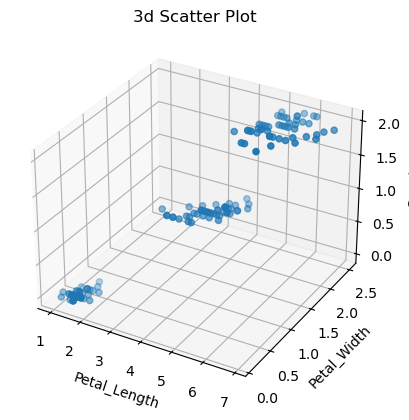

In [13]:
# Let's visualize the data

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(data.petal_length, data.petal_width, data.species)
ax.set_xlabel('Petal_Length')
ax.set_ylabel('Petal_Width')
ax.set_zlabel('Species')
plt.title('3d Scatter Plot')
plt.show()

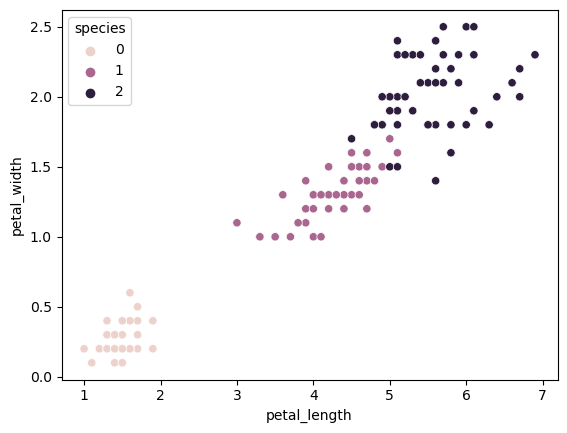

In [15]:
sns.scatterplot(data = data, x = 'petal_length', y = data['petal_width'], hue = data['species'])
plt.show()

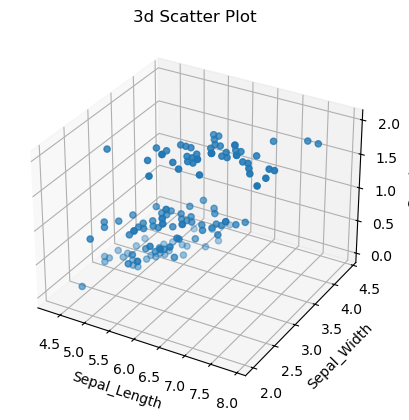

In [14]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(data.sepal_length, data.sepal_width, data.species)
ax.set_xlabel('Sepal_Length')
ax.set_ylabel('Sepal_Width')
ax.set_zlabel('Species')
plt.title('3d Scatter Plot')
plt.show()

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

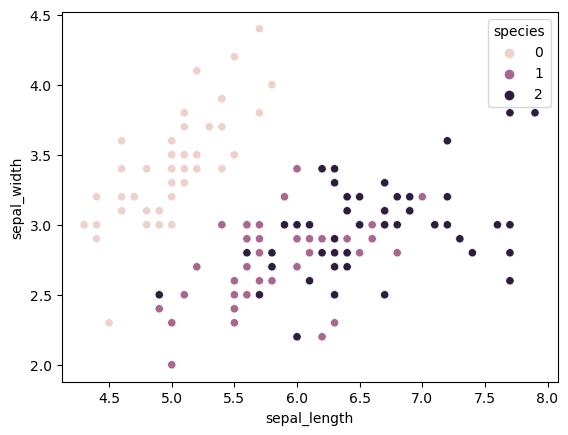

In [16]:
sns.scatterplot(data = data, x = data['sepal_length'], y = data['sepal_width'], hue = data['species'])


In [17]:
# Applying Elbow Technique

In [18]:
k_rng = range(1, 10)
sse = []

for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(data[['petal_length', 'petal_width']])
    sse.append(km.inertia_)

c:\Users\sarga\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sarga\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sarga\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sarga\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [19]:
sse

[550.6434666666667,
 86.40394533571005,
 31.387758974358977,
 19.49352336396547,
 13.933308757908756,
 11.163486299967426,
 9.219714009661836,
 7.631802244955953,
 6.496659206692712]

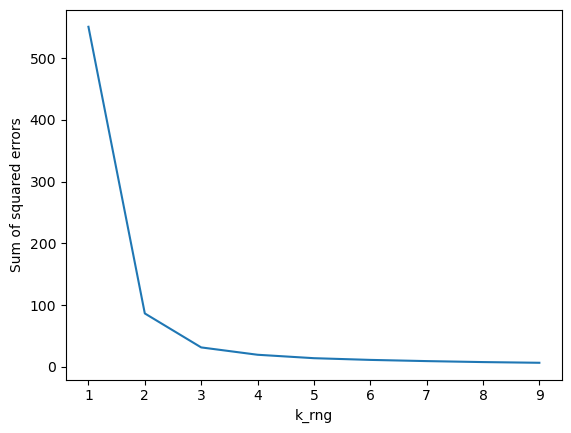

In [20]:
plt.xlabel('k_rng')
plt.ylabel('Sum of squared errors')
plt.plot(k_rng, sse)

In [21]:
# Applying Kmeans Clustering 

In [23]:
km = KMeans(n_clusters = 3, random_state = 0)
y_predict = km.fit_predict(data[['petal_length', 'petal_width']])
print(y_predict)

c:\Users\sarga\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sarga\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 1]


In [25]:
data['cluster'] = y_predict
data.head(150)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,1
146,6.3,2.5,5.0,1.9,2,1
147,6.5,3.0,5.2,2.0,2,1
148,6.2,3.4,5.4,2.3,2,1


In [27]:
# Accuracy Measure

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(data['species'], data['cluster'])
cm

array([[50,  0,  0],
       [ 0,  2, 48],
       [ 0, 46,  4]], dtype=int64)

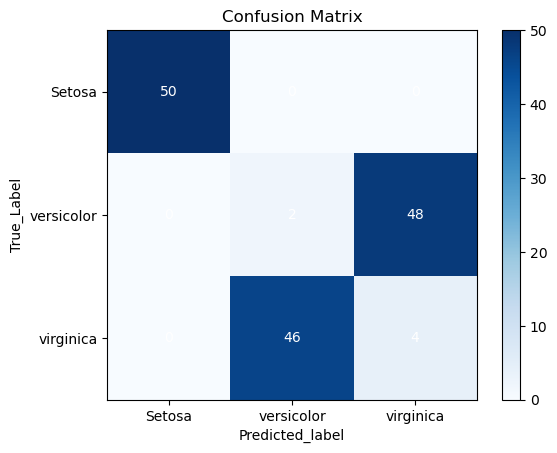

In [28]:
true_labels = data['species']
predicted_labels = data['cluster']

cm = confusion_matrix(true_labels, predicted_labels)
class_labels = ['Setosa', 'versicolor', 'virginica']

# plot confusion matrix

plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Blues)
plt.title('Confusion Matrix')
tick_marks = np.arange(len(class_labels))
plt.colorbar()
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

# fill matrix with values

for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j, i, str(cm[i][j]), ha = 'center', va = 'center', color = 'white')

plt.xlabel('Predicted_label')
plt.ylabel('True_Label')
plt.show()